In [6]:
import requests
from bs4 import BeautifulSoup
import mysql.connector
import datetime
import time

# MySQL connection setup
db = mysql.connector.connect(
    host="127.0.0.1",  # Typically 'localhost' or '127.0.0.1'
    user="root",
    password="kjhyun0221",
    database="news"
)
cursor = db.cursor()

# Create table if it doesn't exist
cursor.execute("""
CREATE TABLE IF NOT EXISTS wti_news (
    id INT AUTO_INCREMENT PRIMARY KEY,
    title VARCHAR(255),
    url VARCHAR(255),
    published_date DATE
)
""")

# Function to insert data into MySQL
def insert_data(title, url, published_date):
    query = "INSERT INTO wti_news (title, url, published_date) VALUES (%s, %s, %s)"
    cursor.execute(query, (title, url, published_date))
    db.commit()

# Google News search URL
search_url = "https://www.google.com/search?q=WTI+crude+oil+news&tbm=nws"

# Send HTTP request
response = requests.get(search_url)
soup = BeautifulSoup(response.text, 'html.parser')
print(1)
# Extract news items
for item in soup.select('.dbsr'):
    title = item.select_one('.nDgy9d').text
    url = item['href']
    published_date = datetime.datetime.now().date()  # Simplification, real date extraction may vary

    # Insert data into MySQL
    insert_data(title, url, published_date)
    
print(2)
# Close MySQL connection
db.close()


1
2


In [18]:
# Google News search URL
search_url = "https://www.google.com/search?q=WTI+crude+oil+news&tbm=nws"

# Send HTTP request
response = requests.get(search_url)
soup = BeautifulSoup(response.text, 'html.parser')

for item in soup.select('.SoAPf'):
    title = item.select_one('.BNeawe vvjwJb AP7Wnd').text
    url = item['href']
    published_date = datetime.datetime.now().date()  # Simplification, real date extraction may vary


<!DOCTYPE html>
<html lang="ko"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>WTI crude oil news - Google 검색</title><script nonce="dtsx6BOfQ3RJvfUwY5wAbA">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.googl
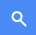
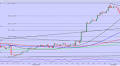
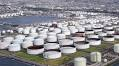
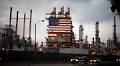
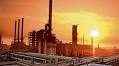
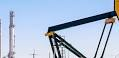

In [19]:
soup